# **INTRO TO MACHINE LEARNING - DECISION TREE AND LOGISTIC REGRESSION**

# To find all the materials for this workshop please see the GitHub repo here: https://github.com/aisutd/Workshop1_Chess_Fall2019

## CHESS DATASET

This is a kaggle dataset which was collected from over 20,000 games on the site Lichess.org. There are several teams on Lichess with over 1,500 players. it has 20058 rows and 16 columns.

It has the following attributes :- 
*   Game ID
*   Rated - indicates the genuinity of the game played
*   Start time
*   End time
*   Number of Turns
*   Game Status - whether the game was resigned or it resulted in checkmate
*   Winner - white / black
*   Time Increment
*   White Player ID
*   White Player Rating
*   Black Player ID
*   Black Player Rating
*   All Moves in Standard Chess Notation
*   Opening Eco (Standardised Code for any given opening)
*   Opening Name
*   Opening Ply (Number of moves in the opening phase)

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. 
Though, we can construct many goals for this dataset, in this workshop our main aim is to predict the winner of the game at Early-game, Mid-game and End-game stages.



## Importing Libraries

numpy and pandas help us to manipulate data and makes it easier to use them.
matplotlib helps us visualise data
io is required to import dataset into Google Colab

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io
from sklearn.model_selection import train_test_split

**Uploading file from the computer**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games.csv


**Loading the dataset into a pandas dataframe**

In [0]:
df = pd.read_csv(io.StringIO(uploaded['games.csv'].decode('utf-8')))
df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


## Data Preprocessing and Visualisation

* We will mainly see which columns are required (based on the goal and it's relevance to    the target variable - "WINNER"). 
* We will also remove those columns that are highly correlated to another column. (Correlation measures the strength of the linear relationship between two quantitative variables). So we either discard the other variable as they measure the same thing or we create a new variable that combines the effects of the highly correlated group.
* We will also play around with the feature "Moves" - try creating new features from it. 



**Dropping Columns based on their relevance to goal**

We will remove the following columns :-
* id (unique value for each row)
* rated (irrelevant)
* created_at (irrelevant)
* last_move_at (irrelevant)
* increment_code (irrelevant)
* white_id (list of names - irrelevant)
* black_id (list of names - irrelevant)
* opening_eco
* opening_name












In [0]:
#drop unneccessary columns
dropped_df = df.drop(['id', 'rated', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id', 'opening_eco', 'opening_name','victory_status'], axis=1)
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply
0,13,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,5
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5
5,5,draw,1250,1002,e4 c5 Nf3 Qa5 a3,4
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10
7,9,black,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,5
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6
9,119,white,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,4


This code allows us to drop these columns specified by name. "Axis=1" indicates that we are altering the data vertically. "inplace=True" indicates that we make these changes to the same dataframe and there's no need to create another copy. 

Thus, we are now left with a dataset of only 7 columns

We can place a **threshold on the number of moves (turns) each game** should have. Here, we keep the **threshold = 15**. So for games having turns less than 15 must be filtered out. 

In [0]:
#drop unneccessary games

index_cond = dropped_df[ dropped_df['turns'] < 15 ].index
 
# Delete these row indexes from dataFrame
dropped_df.drop(index_cond , inplace=True)
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6
9,119,white,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,4
10,39,white,1381,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,1
11,38,black,1381,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,9
12,60,black,1381,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,3


### Working on the moves column

The moves column is represented using the algebraic notation.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/SCD_algebraic_notation.svg/500px-SCD_algebraic_notation.svg.png)

* Each square of the chessboard is identified by a unique coordinate pair—a letter and a number. The vertical columns of squares are labeled a through h from White's left to right. The horizontal rows of squares are numbered 1 to 8 starting from White's side of the board.
* Each piece is identified by a letter -  K for king, Q for queen, R for rook, B for bishop, and N for knight. Pawns are not identified by uppercase letters, but rather by the absence of one.
* When a piece makes a capture, an "x" is inserted immediately before the destination square. For example, Bxe5 (bishop captures the piece on e5). When a pawn makes a capture, the column from which the pawn departed is used to identify the pawn. For example, exd5 (pawn on the e-column captures the piece on d5)
* A move that places the opponent's king in check usually has the symbol "+" appended. Double check is commonly indicated the same as check.


We can extract a lot of information from this feature. 
* We can first split them into early game, mid game and end game stages. The early game moves can be separaetd based on the column 'opening_ply'. The rest of the moves can be split into mid and end stages in ratio 70:30 (randomly selected). Then we can split each row into black and white moves.
* Count the number of moves made by each piece in each stage of both sides. 
* Count the number of checks made by each piece at the end of each stages.
* Also count the umber of pieces captured by each piece of both sides, stage-wise.













In [0]:
#function to split game into three stages - opening, mid and end for black and white
def splitMovesIntoStages(moves,opening_ply):
    count_row = 0
    early_black_row = []
    early_white_row = []
    mid_black_row = []
    mid_white_row = []
    end_black_row = []
    end_white_row = []
    
    # considering each row of the moves column
    element = [move for move in moves.split(' ')]


    opening_moves = int(opening_ply)  # accessing the 'opening_ply' column row by row

    rest_length = len(element) - int(opening_moves)
    mid_length = math.ceil(rest_length * 0.7)
    end_length = rest_length - mid_length
    
    # considering each element of each row of moves column and split them into stages (early, mide and black) and withn each stage into black and white
    for k in range(0, len(element)):
        # EARLY STAGE
        if k < opening_moves:

            if k % 2 == 0:  # WHITE OCCUPIES EVEN MOVES
                early_white_row.append(element[k])
            else:  # BLACK OCCUPIES ODD MOVES
                early_black_row.append(element[k])

        # MID STAGE
        elif k >= opening_moves and k < opening_moves + mid_length:
            if k % 2 == 0:
                mid_white_row.append(element[k])
            else:
                mid_black_row.append(element[k])

        # END STAGE
        else:
          if k % 2 == 0:
            end_white_row.append(element[k])
          else:
            end_black_row.append(element[k])
    
    
    return early_white_row, early_black_row, mid_white_row,mid_black_row,end_white_row,end_black_row
  

In [0]:
#split game into opening,mid and end
dropped_df['Early_stage_white_moves'],dropped_df['Early_stage_black_moves'], dropped_df['Mid_stage_white_moves'], dropped_df['Mid_stage_black_moves'], dropped_df['End_stage_white_moves'], dropped_df['End_stage_black_moves'] = zip(*dropped_df.apply(lambda row: splitMovesIntoStages(row['moves'], row['opening_ply']), axis=1))
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply,Early_stage_white_moves,Early_stage_black_moves,Mid_stage_white_moves,Mid_stage_black_moves,End_stage_white_moves,End_stage_black_moves
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,"[d4, e4]","[Nc6, e5]","[f4, dxe5, fxe5, Qd4, Qe5+]","[f6, fxe5, Nxe5, Nc6]",[c4],"[Nxe5, Bb4+]"
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3,"[e4, d3]",[e5],"[Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c3, Nxa3,...","[d6, c6, b5, a5, c5, Nc6, Ra6, a4, a3, Rxa3, c...","[Bxh5, Rxh7, Qf3+, Bg4+, Rh6+, Qe3+, c4+, Qc3+...","[Kg5, Kf5, Ke6, Kd6, Kc5, Kb5, Kb4, Ka4]"
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,"[d4, Nf3]",[d5],"[Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra1, Nxa7+,...","[Bf5, Nf6, Ng4, Nc6, Qd7, O-O-O, Nb4, Nxa2, Nb...","[Qxf7+, Nh4+, g3, Qf4+, Qxg4+, Qf4+, Qf6+, Nxg...","[Nf6, Kg5, Ng4, Kh5, Kh6, g5, Bg6, Bg7]"
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5,"[e4, Nf3, d4]","[e5, d6]","[d5, a3, Nc3, b4, Bg5, b5, Bxf6, Bd3, O-O, Qxd...","[Nc6, Nb4, Na6, Be7, Nf6, O-O, Nc5, Bxf6, Qd7,...","[Rd7, Kf2, Kg3, Rxb7, Rxa7, Rxh4, Kxg2, b6, b7...","[Rc1+, Rc2+, h5, Kg5, h4+, Rxg2+, Kxh4, Kg5, f..."
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10,"[d4, e4, Nc3, f3, Nxf3]","[d5, dxe4, Nf6, exf3, Nc6]","[Bb5, Bd3, O-O, Be2, Qxe2, Qxf3, Be3, Qxb7, Qc6+]","[a6, Bg4, Nxd4, Nxe2+, Bxf3, Qd4+, Qg4, Rd8]","[Nd5, Nxc7+, Bd2]","[Nd7, e6, Ke7]"
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6,"[e4, Bc4, Nf3]","[e5, Nc6, Nd4]","[d3, Qxf3, h3, a3, Be3, Qxe3, Qf3, Nc3, Bb3, O...","[Nxf3+, Nf6, Bc5, O-O, Bxe3, Re8, c6, b5, Qa5,...","[Kh2, Qxd6, Bxe4, Nd3, Kg1, Rf1, Qd7, Kh1, Kh2]","[Nh5, Qxf2, Rxe4, Qg3+, Qxd3, Rce8, Qe3+, Ng3+..."
9,119,white,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,4,"[e4, exd5]","[d5, Qxd5]","[Nc3, Be2, d4, Bxa6, Nf3, Be3, Ng5, Qh5, Qxf7+...","[Qe5+, Na6, Qf5, bxa6, Qe6+, Bb7, Qc4, Bxg2, Q...","[b5, cxb5, b6, Kf2, b7, b8=Q+, Qb4+, Kxf3, Kg3...","[h4, cxb5, Kg4, f3+, Kf4, h3, Ke4, Kd5, Ke5, K..."
10,39,white,1381,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,1,[e3],[],"[d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, Rfe1,...","[e6, d6, c6, Be7, Nf6, Bd7, c5, dxc5, b6, Bc6,...","[Rad1, Bg5, Bxe7, Rd8+, Red1, Rxe8#]","[Qb7, Re8, Rxe7, Re8, Bd5]"
11,38,black,1381,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,9,"[e4, d4, e5, c3, Nf3]","[e6, d5, c5, Nc6]","[Be3, Nbd2, cxd4, Rb1, Qb3, Nxb3, Kd1, fxe3, N...","[Qb6, Qxb2, cxd4, Nb4, Qxa2, Qxb3, Nc2+, Nxe3+...","[Nxe4, Ke2, Rhxf1, Ned2]","[Ne3+, Nxf1, b6, Ba6+]"
12,60,black,1381,1936,e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...,3,"[e4, Nf3]",[e6],"[exd5, Qe2+, Nc3, d4, g4, Bg2, O-O, h3, Bf4, R...","[d5, exd5, Be7, Nf6, O-O, Bxg4, Nbd7, c6, Bh5,...","[Nc3, Rad1, Qxc3, e4, d5, Re3, Ra1, Ra2]","[Bb4, Qc7, Bxc3, Qg3, Re6, Rf6, Nc5, Rg6, Nxe4]"


In [0]:
#calculate no of moves for each piece
def movesByEachPiece(moves):
  
  noOfKingMoves = 0
  noOfQueenMoves = 0
  noOfRookMoves = 0
  noOfBishopMoves = 0
  noOfKnightMoves = 0
  noOfPawnMoves = 0
  
  for move in moves:
    if move.startswith('K'):
      noOfKingMoves += 1
    elif move.startswith('Q'):
      noOfQueenMoves += 1
    elif move.startswith('R'):
      noOfRookMoves += 1
    elif move.startswith('B'):
      noOfBishopMoves += 1
    elif move.startswith('N'):
      noOfKnightMoves += 1
    else:
      noOfPawnMoves += 1
  return noOfKingMoves,noOfQueenMoves,noOfRookMoves,noOfBishopMoves,noOfKnightMoves,noOfPawnMoves

In [0]:
#calculate no of moves for all pieces for white early game
dropped_df['king_early_moves_white'],dropped_df['queen_early_moves_white'],dropped_df['rook_early_moves_white'],dropped_df['bishop_early_moves_white'],dropped_df['knight_early_moves_white'],dropped_df['pawn_early_moves_white'] = zip(*dropped_df['Early_stage_white_moves'].apply(movesByEachPiece))

#calculate no of moves for all pieces for white mid game
dropped_df['king_mid_moves_white'], dropped_df['queen_mid_moves_white'], dropped_df['rook_mid_moves_white'], dropped_df['bishop_mid_moves_white'], dropped_df['knight_mid_moves_white'], dropped_df['pawn_mid_moves_white'] = zip(*dropped_df['Mid_stage_white_moves'].apply(movesByEachPiece))

#calculate no of moves for all pieces for white end game
dropped_df['king_end_moves_white'], dropped_df['queen_end_moves_white'], dropped_df['rook_end_moves_white'], dropped_df['bishop_end_moves_white'], dropped_df['knight_end_moves_white'], dropped_df['pawn_end_moves_white'] = zip(*dropped_df['End_stage_white_moves'].apply(movesByEachPiece))

#calculate no of moves for all pieces for black early game
dropped_df['king_early_moves_black'], dropped_df['queen_early_moves_black'], dropped_df['rook_early_moves_black'], dropped_df['bishop_early_moves_black'], dropped_df['knight_early_moves_black'], dropped_df['pawn_early_moves_black'] = zip(*dropped_df['Early_stage_black_moves'].apply(movesByEachPiece))

#calculate no of moves for all pieces for black mid game
dropped_df['king_mid_moves_black'], dropped_df['queen_mid_moves_black'], dropped_df['rook_mid_moves_black'], dropped_df['bishop_mid_moves_black'], dropped_df['knight_mid_moves_black'], dropped_df['pawn_mid_moves_black'] = zip(*dropped_df['Mid_stage_black_moves'].apply(movesByEachPiece))

#calculate no of moves for all pieces for black mid game
dropped_df['king_end_moves_black'], dropped_df['queen_end_moves_black'], dropped_df['rook_end_moves_black'], dropped_df['bishop_end_moves_black'], dropped_df['knight_end_moves_black'], dropped_df['pawn_end_moves_black'] = zip(*dropped_df['End_stage_black_moves'].apply(movesByEachPiece))

In [0]:
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply,Early_stage_white_moves,Early_stage_black_moves,Mid_stage_white_moves,Mid_stage_black_moves,End_stage_white_moves,End_stage_black_moves,king_early_moves_white,queen_early_moves_white,rook_early_moves_white,bishop_early_moves_white,knight_early_moves_white,pawn_early_moves_white,king_mid_moves_white,queen_mid_moves_white,rook_mid_moves_white,bishop_mid_moves_white,knight_mid_moves_white,pawn_mid_moves_white,king_end_moves_white,queen_end_moves_white,rook_end_moves_white,bishop_end_moves_white,knight_end_moves_white,pawn_end_moves_white,king_early_moves_black,queen_early_moves_black,rook_early_moves_black,bishop_early_moves_black,knight_early_moves_black,pawn_early_moves_black,king_mid_moves_black,queen_mid_moves_black,rook_mid_moves_black,bishop_mid_moves_black,knight_mid_moves_black,pawn_mid_moves_black,king_end_moves_black,queen_end_moves_black,rook_end_moves_black,bishop_end_moves_black,knight_end_moves_black,pawn_end_moves_black
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,"[d4, e4]","[Nc6, e5]","[f4, dxe5, fxe5, Qd4, Qe5+]","[f6, fxe5, Nxe5, Nc6]",[c4],"[Nxe5, Bb4+]",0,0,0,0,0,2,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,2,2,0,0,0,1,1,0
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3,"[e4, d3]",[e5],"[Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c3, Nxa3,...","[d6, c6, b5, a5, c5, Nc6, Ra6, a4, a3, Rxa3, c...","[Bxh5, Rxh7, Qf3+, Bg4+, Rh6+, Qe3+, c4+, Qc3+...","[Kg5, Kf5, Ke6, Kd6, Kc5, Kb5, Kb4, Ka4]",0,0,0,0,0,2,0,0,3,5,3,9,0,3,2,3,0,1,0,0,0,0,0,1,5,1,2,1,3,9,8,0,0,0,0,0
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,"[d4, Nf3]",[d5],"[Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra1, Nxa7+,...","[Bf5, Nf6, Ng4, Nc6, Qd7, O-O-O, Nb4, Nxa2, Nb...","[Qxf7+, Nh4+, g3, Qf4+, Qxg4+, Qf4+, Qf6+, Nxg...","[Nf6, Kg5, Ng4, Kh5, Kh6, g5, Bg6, Bg7]",0,0,0,0,1,1,0,4,3,4,6,3,0,6,0,0,2,1,0,0,0,0,0,1,7,2,0,3,6,3,3,0,0,2,2,1
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5,"[e4, Nf3, d4]","[e5, d6]","[d5, a3, Nc3, b4, Bg5, b5, Bxf6, Bd3, O-O, Qxd...","[Nc6, Nb4, Na6, Be7, Nf6, O-O, Nc5, Bxf6, Qd7,...","[Rd7, Kf2, Kg3, Rxb7, Rxa7, Rxh4, Kxg2, b6, b7...","[Rc1+, Rc2+, h5, Kg5, h4+, Rxg2+, Kxh4, Kg5, f...",0,0,0,0,1,2,0,3,10,3,7,8,3,1,6,0,0,4,0,0,0,0,0,2,4,5,7,5,6,5,6,0,3,0,0,4
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10,"[d4, e4, Nc3, f3, Nxf3]","[d5, dxe4, Nf6, exf3, Nc6]","[Bb5, Bd3, O-O, Be2, Qxe2, Qxf3, Be3, Qxb7, Qc6+]","[a6, Bg4, Nxd4, Nxe2+, Bxf3, Qd4+, Qg4, Rd8]","[Nd5, Nxc7+, Bd2]","[Nd7, e6, Ke7]",0,0,0,0,2,3,0,4,0,4,0,1,0,0,0,1,2,0,0,0,0,0,2,3,0,2,1,2,2,1,1,0,0,0,1,1
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6,"[e4, Bc4, Nf3]","[e5, Nc6, Nd4]","[d3, Qxf3, h3, a3, Be3, Qxe3, Qf3, Nc3, Bb3, O...","[Nxf3+, Nf6, Bc5, O-O, Bxe3, Re8, c6, b5, Qa5,...","[Kh2, Qxd6, Bxe4, Nd3, Kg1, Rf1, Qd7, Kh1, Kh2]","[Nh5, Qxf2, Rxe4, Qg3+, Qxd3, Rce8, Qe3+, Ng3+...",0,0,0,1,1,1,0,6,2,3,3,7,4,2,1,1,1,0,0,0,0,0,2,1,0,4,2,4,4,7,0,4,2,0,3,0
9,119,white,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,4,"[e4, exd5]","[d5, Qxd5]","[Nc3, Be2, d4, Bxa6, Nf3, Be3, Ng5, Qh5, Qxf7+...","[Qe5+, Na6, Qf5, bxa6, Qe6+, Bb7, Qc4, Bxg2, Q...","[b5, cxb5, b6, Kf2, b7, b8=Q+, Qb4+, Kxf3, Kg3...","[h4, cxb5, Kg4, f3+, Kf4, h3, Ke4, Kd5, Ke5, K...",0,0,0,0,0,2,7,2,12,5,8,7,6,6,0,0,0,5,0,1,0,0,0,1,5,5,12,8,2,8,13,0,0,0,0,4
10,39,white,1381,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,1,[e3],[],"[d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, Rfe1,...","[e6, d6, c6, Be7, Nf6, Bd7, c5, dxc5, b6, Bc6,...","[Rad1, Bg5, Bxe7, Rd8+, Red1, Rxe8#]","[Qb7, Re8, Rxe7, Re8, Bd5]",0,0,0,0,0,1,0,1,1,3,3,5,0,0,4,2,0,0,0,0,0,0,0,0,0,2,0,3,2,7,0,1,3,1,0,0
11,38,black,1381,1867,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...,9,"[e4, d4, e5, c3, Nf3]","[e6, d5, c5, Nc6]","[Be3, Nbd2, cxd4, Rb1, Qb3, Nxb3, Kd1, fxe3, N...","[Qb6, Qxb2, cxd4, Nb4, Qxa2, Qxb3, Nc2+, Nxe3+...",

In [0]:
#calculate number of checks in each phase by black and white
def checksByEachSide(moves):
  checks = 0
  for move in moves:
    if '+' in move:
      checks += 1;
  return checks

In [0]:
#checks by white in each phase
dropped_df['checks_early_white'] = dropped_df['Early_stage_white_moves'].apply(checksByEachSide)
dropped_df['checks_mid_white'] = dropped_df['Mid_stage_white_moves'].apply(checksByEachSide)
dropped_df['checks_end_white'] = dropped_df['End_stage_white_moves'].apply(checksByEachSide)

#checks by black in each phase
dropped_df['checks_early_black'] = dropped_df['Early_stage_black_moves'].apply(checksByEachSide)
dropped_df['checks_mid_black'] = dropped_df['Mid_stage_black_moves'].apply(checksByEachSide)
dropped_df['checks_end_black'] = dropped_df['End_stage_black_moves'].apply(checksByEachSide)


In [0]:
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply,Early_stage_white_moves,Early_stage_black_moves,Mid_stage_white_moves,Mid_stage_black_moves,End_stage_white_moves,End_stage_black_moves,king_early_moves_white,queen_early_moves_white,rook_early_moves_white,bishop_early_moves_white,knight_early_moves_white,pawn_early_moves_white,king_mid_moves_white,queen_mid_moves_white,rook_mid_moves_white,bishop_mid_moves_white,knight_mid_moves_white,pawn_mid_moves_white,king_end_moves_white,queen_end_moves_white,rook_end_moves_white,bishop_end_moves_white,knight_end_moves_white,pawn_end_moves_white,king_early_moves_black,queen_early_moves_black,rook_early_moves_black,bishop_early_moves_black,knight_early_moves_black,pawn_early_moves_black,king_mid_moves_black,queen_mid_moves_black,rook_mid_moves_black,bishop_mid_moves_black,knight_mid_moves_black,pawn_mid_moves_black,king_end_moves_black,queen_end_moves_black,rook_end_moves_black,bishop_end_moves_black,knight_end_moves_black,pawn_end_moves_black,checks_early_white,checks_mid_white,checks_end_white,checks_early_black,checks_mid_black,checks_end_black
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,"[d4, e4]","[Nc6, e5]","[f4, dxe5, fxe5, Qd4, Qe5+]","[f6, fxe5, Nxe5, Nc6]",[c4],"[Nxe5, Bb4+]",0,0,0,0,0,2,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,2,2,0,0,0,1,1,0,0,1,0,0,0,1
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3,"[e4, d3]",[e5],"[Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c3, Nxa3,...","[d6, c6, b5, a5, c5, Nc6, Ra6, a4, a3, Rxa3, c...","[Bxh5, Rxh7, Qf3+, Bg4+, Rh6+, Qe3+, c4+, Qc3+...","[Kg5, Kf5, Ke6, Kd6, Kc5, Kb5, Kb4, Ka4]",0,0,0,0,0,2,0,0,3,5,3,9,0,3,2,3,0,1,0,0,0,0,0,1,5,1,2,1,3,9,8,0,0,0,0,0,0,2,6,0,0,0
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,"[d4, Nf3]",[d5],"[Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra1, Nxa7+,...","[Bf5, Nf6, Ng4, Nc6, Qd7, O-O-O, Nb4, Nxa2, Nb...","[Qxf7+, Nh4+, g3, Qf4+, Qxg4+, Qf4+, Qf6+, Nxg...","[Nf6, Kg5, Ng4, Kh5, Kh6, g5, Bg6, Bg7]",0,0,0,0,1,1,0,4,3,4,6,3,0,6,0,0,2,1,0,0,0,0,0,1,7,2,0,3,6,3,3,0,0,2,2,1,0,6,6,0,0,0
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5,"[e4, Nf3, d4]","[e5, d6]","[d5, a3, Nc3, b4, Bg5, b5, Bxf6, Bd3, O-O, Qxd...","[Nc6, Nb4, Na6, Be7, Nf6, O-O, Nc5, Bxf6, Qd7,...","[Rd7, Kf2, Kg3, Rxb7, Rxa7, Rxh4, Kxg2, b6, b7...","[Rc1+, Rc2+, h5, Kg5, h4+, Rxg2+, Kxh4, Kg5, f...",0,0,0,0,1,2,0,3,10,3,7,8,3,1,6,0,0,4,0,0,0,0,0,2,4,5,7,5,6,5,6,0,3,0,0,4,0,2,2,0,0,4
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10,"[d4, e4, Nc3, f3, Nxf3]","[d5, dxe4, Nf6, exf3, Nc6]","[Bb5, Bd3, O-O, Be2, Qxe2, Qxf3, Be3, Qxb7, Qc6+]","[a6, Bg4, Nxd4, Nxe2+, Bxf3, Qd4+, Qg4, Rd8]","[Nd5, Nxc7+, Bd2]","[Nd7, e6, Ke7]",0,0,0,0,2,3,0,4,0,4,0,1,0,0,0,1,2,0,0,0,0,0,2,3,0,2,1,2,2,1,1,0,0,0,1,1,0,1,1,0,2,0
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6,"[e4, Bc4, Nf3]","[e5, Nc6, Nd4]","[d3, Qxf3, h3, a3, Be3, Qxe3, Qf3, Nc3, Bb3, O...","[Nxf3+, Nf6, Bc5, O-O, Bxe3, Re8, c6, b5, Qa5,...","[Kh2, Qxd6, Bxe4, Nd3, Kg1, Rf1, Qd7, Kh1, Kh2]","[Nh5, Qxf2, Rxe4, Qg3+, Qxd3, Rce8, Qe3+, Ng3+...",0,0,0,1,1,1,0,6,2,3,3,7,4,2,1,1,1,0,0,0,0,0,2,1,0,4,2,4,4,7,0,4,2,0,3,0,0,0,0,0,2,4
9,119,white,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,4,"[e4, exd5]","[d5, Qxd5]","[Nc3, Be2, d4, Bxa6, Nf3, Be3, Ng5, Qh5, Qxf7+...","[Qe5+, Na6, Qf5, bxa6, Qe6+, Bb7, Qc4, Bxg2, Q...","[b5, cxb5, b6, Kf2, b7, b8=Q+, Qb4+, Kxf3, Kg3...","[h4, cxb5, Kg4, f3+, Kf4, h3, Ke4, Kd5, Ke5, K...",0,0,0,0,0,2,7,2,12,5,8,7,6,6,0,0,0,5,0,1,0,0,0,1,5,5,12,8,2,8,13,0,0,0,0,4,0,2,2,0,8,1
10,39,white,1381,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,1,[e3],[],"[d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, Rfe1,...","[e6, d6, c6, Be7, Nf6, Bd7, c5, dxc5, b6, Bc6,...","[Rad1, Bg5, Bxe7, Rd8+, Red1, Rxe8#]","[Qb7, Re8, Rxe7, Re8, Bd5]",0,0,0,0,0,1,0,1,1,3,3,5,0,0,4,2,0,0,0,0,0,0,0,0,0,2,0,3,2,7,0,1,3,1,0,0,0,0,1,0,0,0
11,38,black,1381,186

In [0]:
#calculate number of pieces captured by each piece
def capturesByEachPiece(moves):
  noOfCapturesByKing = 0
  noOfCapturesByQueen = 0
  noOfCapturesByRook = 0
  noOfCapturesByBishop = 0
  noOfCapturesByKnight = 0
  noOfCapturesByPawn = 0
  for move in moves:
    if 'x' in move:
      if move.startswith('K'):
        noOfCapturesByKing += 1
      elif move.startswith('Q'):
        noOfCapturesByQueen += 1
      elif move.startswith('R'):
        noOfCapturesByRook += 1
      elif move.startswith('B'):
        noOfCapturesByBishop += 1
      elif move.startswith('N'):
        noOfCapturesByKnight += 1
      else:
        noOfCapturesByPawn += 1
  return noOfCapturesByKing,noOfCapturesByQueen,noOfCapturesByRook,noOfCapturesByBishop,noOfCapturesByKnight,noOfCapturesByPawn

In [0]:
#calculate no of captures for all pieces for white early game
dropped_df['king_early_captures_white'],dropped_df['queen_early_captures_white'],dropped_df['rook_early_captures_white'],dropped_df['bishop_early_captures_white'],dropped_df['knight_early_captures_white'],dropped_df['pawn_early_captures_white'] = zip(*dropped_df['Early_stage_white_moves'].apply(capturesByEachPiece))

#calculate no of captures for all pieces for white mid game
dropped_df['king_mid_captures_white'], dropped_df['queen_mid_captures_white'], dropped_df['rook_mid_captures_white'], dropped_df['bishop_mid_captures_white'], dropped_df['knight_mid_captures_white'], dropped_df['pawn_mid_captures_white'] = zip(*dropped_df['Mid_stage_white_moves'].apply(capturesByEachPiece))

#calculate no of captures for all pieces for white end game
dropped_df['king_end_captures_white'], dropped_df['queen_end_captures_white'], dropped_df['rook_end_captures_white'], dropped_df['bishop_end_captures_white'], dropped_df['knight_end_captures_white'], dropped_df['pawn_end_captures_white'] = zip(*dropped_df['End_stage_white_moves'].apply(capturesByEachPiece))

#calculate no of captures for all pieces for black early game
dropped_df['king_early_captures_black'], dropped_df['queen_early_captures_black'], dropped_df['rook_early_captures_black'], dropped_df['bishop_early_captures_black'], dropped_df['knight_early_captures_black'], dropped_df['pawn_early_captures_black'] = zip(*dropped_df['Early_stage_black_moves'].apply(capturesByEachPiece))

#calculate no of captures for all pieces for black mid game
dropped_df['king_mid_captures_black'], dropped_df['queen_mid_captures_black'], dropped_df['rook_mid_captures_black'], dropped_df['bishop_mid_captures_black'], dropped_df['knight_mid_captures_black'], dropped_df['pawn_mid_captures_black'] = zip(*dropped_df['Mid_stage_black_moves'].apply(capturesByEachPiece))

#calculate no of captures for all pieces for black mid game
dropped_df['king_end_captures_black'], dropped_df['queen_end_captures_black'], dropped_df['rook_end_captures_black'], dropped_df['bishop_end_captures_black'], dropped_df['knight_end_captures_black'], dropped_df['pawn_end_captures_black'] = zip(*dropped_df['End_stage_black_moves'].apply(capturesByEachPiece))

In [0]:
dropped_df

,turns,winner,white_rating,black_rating,moves,opening_ply,Early_stage_white_moves,Early_stage_black_moves,Mid_stage_white_moves,Mid_stage_black_moves,End_stage_white_moves,End_stage_black_moves,king_early_moves_white,queen_early_moves_white,rook_early_moves_white,bishop_early_moves_white,knight_early_moves_white,pawn_early_moves_white,king_mid_moves_white,queen_mid_moves_white,rook_mid_moves_white,bishop_mid_moves_white,knight_mid_moves_white,pawn_mid_moves_white,king_end_moves_white,queen_end_moves_white,rook_end_moves_white,bishop_end_moves_white,knight_end_moves_white,pawn_end_moves_white,king_early_moves_black,queen_early_moves_black,rook_early_moves_black,bishop_early_moves_black,knight_early_moves_black,pawn_early_moves_black,king_mid_moves_black,queen_mid_moves_black,rook_mid_moves_black,bishop_mid_moves_black,...,checks_end_white,checks_early_black,checks_mid_black,checks_end_black,king_early_captures_white,queen_early_captures_white,rook_early_captures_white,bishop_early_captures_white,knight_early_captures_white,pawn_early_captures_white,king_mid_captures_white,queen_mid_captures_white,rook_mid_captures_white,bishop_mid_captures_white,knight_mid_captures_white,pawn_mid_captures_white,king_end_captures_white,queen_end_captures_white,rook_end_captures_white,bishop_end_captures_white,knight_end_captures_white,pawn_end_captures_white,king_early_captures_black,queen_early_captures_black,rook_early_captures_black,bishop_early_captures_black,knight_early_captures_black,pawn_early_captures_black,king_mid_captures_black,queen_mid_captures_black,rook_mid_captures_black,bishop_mid_captures_black,knight_mid_captures_black,pawn_mid_captures_black,king_end_captures_black,queen_end_captures_black,rook_end_captures_black,bishop_end_captures_black,knight_end_captures_black,pawn_end_captures_black
1,16,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,"[d4, e4]","[Nc6, e5]","[f4, dxe5, fxe5, Qd4, Qe5+]","[f6, fxe5, Nxe5, Nc6]",[c4],"[Nxe5, Bb4+]",0,0,0,0,0,2,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,61,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3,"[e4, d3]",[e5],"[Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c3, Nxa3,...","[d6, c6, b5, a5, c5, Nc6, Ra6, a4, a3, Rxa3, c...","[Bxh5, Rxh7, Qf3+, Bg4+, Rh6+, Qe3+, c4+, Qc3+...","[Kg5, Kf5, Ke6, Kd6, Kc5, Kb5, Kb4, Ka4]",0,0,0,0,0,2,0,0,3,5,3,9,0,3,2,3,0,1,0,0,0,0,0,1,5,1,2,1,...,6,0,0,0,0,0,0,0,0,0,0,0,2,2,1,7,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,61,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,"[d4, Nf3]",[d5],"[Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra1, Nxa7+,...","[Bf5, Nf6, Ng4, Nc6, Qd7, O-O-O, Nb4, Nxa2, Nb...","[Qxf7+, Nh4+, g3, Qf4+, Qxg4+, Qf4+, Qf6+, Nxg...","[Nf6, Kg5, Ng4, Kh5, Kh6, g5, Bg6, Bg7]",0,0,0,0,1,1,0,4,3,4,6,3,0,6,0,0,2,1,0,0,0,0,0,1,7,2,0,3,...,6,0,0,0,0,0,0,0,0,0,0,1,0,2,2,1,0,3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0
4,95,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5,"[e4, Nf3, d4]","[e5, d6]","[d5, a3, Nc3, b4, Bg5, b5, Bxf6, Bd3, O-O, Qxd...","[Nc6, Nb4, Na6, Be7, Nf6, O-O, Nc5, Bxf6, Qd7,...","[Rd7, Kf2, Kg3, Rxb7, Rxa7, Rxh4, Kxg2, b6, b7...","[Rc1+, Rc2+, h5, Kg5, h4+, Rxg2+, Kxh4, Kg5, f...",0,0,0,0,1,2,0,3,10,3,7,8,3,1,6,0,0,4,0,0,0,0,0,2,4,5,7,5,...,2,0,0,4,0,0,0,0,0,0,0,3,2,1,3,0,1,0,3,0,0,1,0,0,0,0,0,0,0,1,1,2,1,2,2,0,1,0,0,0
6,33,white,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,10,"[d4, e4, Nc3, f3, Nxf3]","[d5, dxe4, Nf6, exf3, Nc6]","[Bb5, Bd3, O-O, Be2, Qxe2, Qxf3, Be3, Qxb7, Qc6+]","[a6, Bg4, Nxd4, Nxe2+, Bxf3, Qd4+, Qg4, Rd8]","[Nd5, Nxc7+, Bd2]","[Nd7, e6, Ke7]",0,0,0,0,2,3,0,4,0,4,0,1,0,0,0,1,2,0,0,0,0,0,2,3,0,2,1,2,...,1,0,2,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,0,0,0,0
8,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,6,"[e4, Bc4, Nf3]","[e5, Nc6, Nd4]","[d3, Qxf3, h3, a3, Be3, Qxe3, Qf3, Nc3, Bb3, O...",

In [0]:
#drop opening_ply and all moves column
feature_extracted_df = dropped_df.drop(['opening_ply','moves','Early_stage_white_moves', 'Early_stage_black_moves','Mid_stage_white_moves', 'Mid_stage_black_moves','End_stage_white_moves', 'End_stage_black_moves',],axis=1)

In [0]:
len(feature_extracted_df.columns)

82

In [0]:
#drop columns with only one unique value
for col in feature_extracted_df.columns:
    if len(feature_extracted_df[col].unique()) == 1:
        print(col)
        feature_extracted_df.drop(col,inplace=True,axis=1)

king_early_moves_white
king_early_moves_black
king_early_captures_white
king_early_captures_black
rook_early_captures_black


In [0]:
#convert target to numerical data
feature_extracted_df['winner'] = feature_extracted_df['winner'].astype('category')
feature_extracted_df['winner'] = feature_extracted_df['winner'].cat.codes
feature_extracted_df['winner'] 

1        0
2        2
3        2
4        2
6        2
8        0
9        2
10       2
11       0
12       0
13       0
14       2
15       0
16       0
17       0
18       0
19       2
22       2
23       2
25       2
26       2
27       0
28       0
29       0
30       0
31       0
32       2
33       0
35       0
36       2
        ..
20026    0
20027    2
20028    2
20029    0
20030    0
20031    0
20032    2
20033    0
20034    1
20035    2
20036    2
20037    0
20038    0
20039    2
20040    0
20041    0
20042    2
20044    2
20045    2
20046    0
20047    2
20048    2
20049    2
20051    0
20052    2
20053    2
20054    0
20055    2
20056    2
20057    0
Name: winner, Length: 19021, dtype: int8

In [0]:
#perform correlation between columns
corr = feature_extracted_df.corr(method = "pearson")

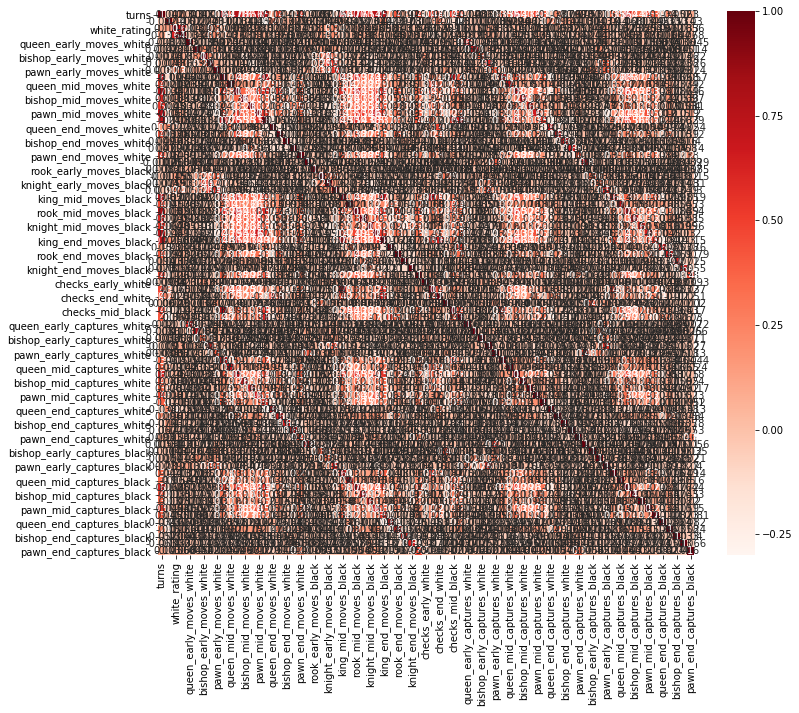

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#correlation of winner with other columns
corr.winner

turns                         -0.041674
winner                         1.000000
white_rating                   0.138106
black_rating                  -0.160625
queen_early_moves_white       -0.019604
rook_early_moves_white        -0.022102
bishop_early_moves_white       0.014287
knight_early_moves_white       0.023114
pawn_early_moves_white         0.011041
king_mid_moves_white          -0.112018
queen_mid_moves_white          0.020682
rook_mid_moves_white          -0.033507
bishop_mid_moves_white         0.011009
knight_mid_moves_white         0.004520
pawn_mid_moves_white          -0.050064
king_end_moves_white          -0.243695
queen_end_moves_white          0.218656
rook_end_moves_white           0.033246
bishop_end_moves_white         0.072096
knight_end_moves_white         0.079205
pawn_end_moves_white           0.060331
queen_early_moves_black        0.024854
rook_early_moves_black         0.003113
bishop_early_moves_black      -0.004463
knight_early_moves_black       0.004884


In [0]:
#Selecting highly correlated features
cor_target = abs(corr["winner"])
relevant_features = cor_target[cor_target>0.15]
relevant_features

winner                      1.000000
black_rating                0.160625
king_end_moves_white        0.243695
queen_end_moves_white       0.218656
king_end_moves_black        0.196443
queen_end_moves_black       0.228996
checks_end_white            0.273795
checks_end_black            0.298953
queen_end_captures_white    0.236319
queen_end_captures_black    0.229379
rook_end_captures_black     0.152997
Name: winner, dtype: float64

In [0]:
#select columns that have high correlation with output 'winner' column
columns = ["winner","black_rating","king_end_moves_white","queen_end_moves_white","king_end_moves_black","queen_end_moves_black","checks_end_white","checks_end_black","queen_end_captures_white","queen_end_captures_black","rook_end_captures_black"]
feature_engineered_df = feature_extracted_df[columns]

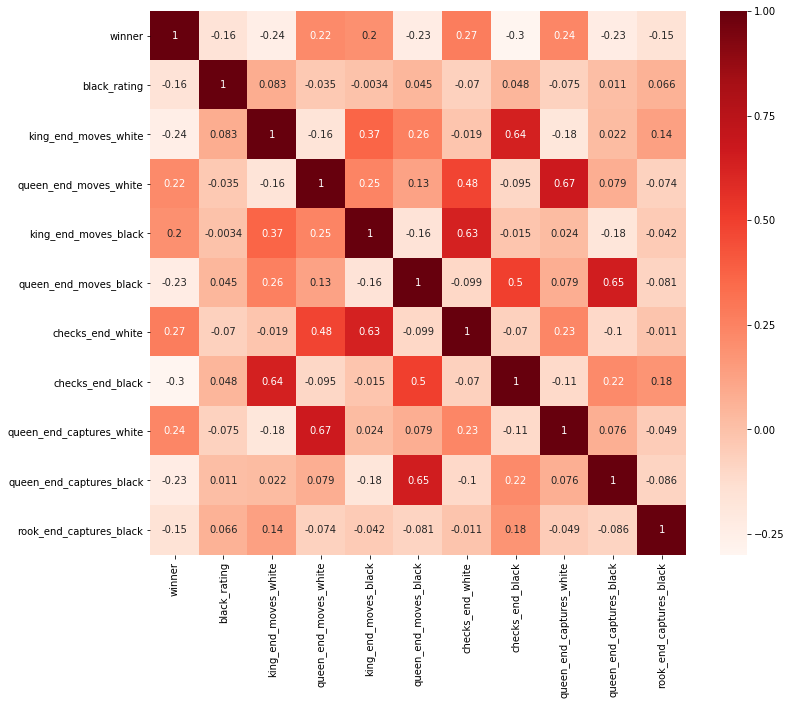

In [0]:
#display correlation between engineered features
corr = feature_engineered_df.corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
feature_engineered_df

,winner,black_rating,king_end_moves_white,queen_end_moves_white,king_end_moves_black,queen_end_moves_black,checks_end_white,checks_end_black,queen_end_captures_white,queen_end_captures_black,rook_end_captures_black
1,0,1261,0,0,0,0,0,1,0,0,0
2,2,1500,0,3,8,0,6,0,0,0,0
3,2,1454,0,6,3,0,6,0,3,0,0
4,2,1469,3,1,6,0,2,4,0,0,1
6,2,1423,0,0,1,0,1,0,0,0,0
8,0,1392,4,2,0,4,0,4,1,2,1
9,2,1209,6,6,13,0,2,1,0,0,0
10,2,1272,0,0,0,1,1,0,0,0,1
11,0,1867,1,0,0,0,0,2,0,0,0
12,0,1936,0,1,0,2,0,0,1,0,0


In [0]:
#split into train and test
label = feature_engineered_df['winner']
features = feature_engineered_df.drop('winner',axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
y_train

3918     2
4689     2
14063    2
3576     0
19324    2
6886     2
13972    0
17330    0
15743    0
7096     0
9630     0
11043    0
5998     0
9420     0
8513     2
11345    0
7138     0
724      0
8961     0
3824     2
13903    2
17108    2
8767     2
15218    2
767      2
18805    0
9396     2
11404    0
18672    0
6211     2
        ..
8501     0
18339    0
19379    2
18012    0
10178    0
11662    1
13219    0
19872    2
19184    2
9654     1
8749     2
17171    2
6720     2
11424    2
15114    2
11090    2
5616     0
7691     2
7828     2
16325    0
16348    0
16486    0
18296    0
10622    0
1659     0
12132    0
8055     0
9489     0
8868     0
19414    2
Name: winner, Length: 15216, dtype: int8

##Decision Trees

Conceptual Background
---
---
**What is a Decision Tree?**
* A graphical representation of possible solutions to a decision (based on certain conditions).
* It starts with the root and branches off into a number of leaves.
* A systematic process with a visual representation.


---
**Parts of a Decision Tree**
* Each node represents a feature or attribute.
* Each branch represents a decision or rule.
* Each leaf represents an outcome.


---

**Algorithms and Approaches to help build a Decision Tree?**
* Classification and Regression Trees (CART algorithm)
* Iterative Dichotomiser 3 (using entropy and information gain)
* For this workshop, we will be using the Decision Tree Classifier provided by SciKit-Learn.

---

**Process**
* Determine the root node. We pick the attribute that best classifies the training data.
* Top-down process
* Which attribute to choose? The one with the higest information gain.
* Information gain is defined using a measure called "entropy".
* 𝐻(𝑋)=−∑𝑛𝑖=1𝑃(𝑥𝑖)log2𝑃(𝑥𝑖)

---

**Advantages of applying Decision Trees**
* Easy usability and comprehension
* Incredibly transparent and robust


In [0]:
from sklearn.tree import DecisionTreeClassifier # imports the Decision Tree Classifier

# We have already imported other libraries and loaded our data
# We splitted our data into feature and target variables, as well as into training and test sets.

# Now, we build the model.
dtree = DecisionTreeClassifier() # creates Decision Tree classifier object

# Trains Decision Tree classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import classification_report, accuracy_score

# Prediction of test dataset and evaluation of the model
y_pred = dtree.predict(X_test) 

# Model Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.6554533508541392
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1711
           1       0.26      0.24      0.25       209
           2       0.69      0.69      0.69      1885

    accuracy                           0.66      3805
   macro avg       0.54      0.53      0.53      3805
weighted avg       0.65      0.66      0.65      3805



##Logistic Regression

Conceptual Background
---
---
**Assumptions**


*   Our data can be split into 2 regions
*   This split is linear, meaning no curves or folds, etc.
*   Ex: In 2 dimensions, this split would be a line, and in 3 dimensions a plane
*   Generally, we want a (n - 1) dimensional plane to split n-dimensional space into 2 classes
*   We call this (n - 1) plane the linear discriminant, because 1) it's linear, 2) it discriminates between some class A and not A

---
**Goals**


*   Given a input point **x** predict the probability that **x** belongs to the data class **y** - denoted *P<sub>y</sub>(x)*
*   Ex: Given some characteristics about a person, whether they're above or below 130 pounds
*   **x** would be the characteristics, and the possible classes would be above & below 130 pounds

---

**Process**: 
*This may be a little confusing for some, please ask me questions*
* Let's simplify our model to 2 dimensions, so we're looking for a discriminator in 1 dimension
* Because our plane is linear, it can be represented by *bias* + *C<sub>0</sub>x*
* The issue is that this linear function also has range from (-$\infty$,$\infty$)
* We need to map this to **(0, 1)** to represent a probabilitiy
* We can do this by using the Sigmoid function, shown below
* D: (-$\infty$, $\infty$) -> R: **(0, 1)** - this allows us to turn outputs from the linear discriminant into probability  *P<sub>y</sub>(x)*

![alt text](https://cdn-images-1.medium.com/max/1600/1*Xu7B5y9gp0iL5ooBj7LtWw.png "Sigmoid Function")

Importing necessary modules & Parameters
---
---
**Pipeline**

*   Describes a pipeline *(what a surprise)* of data transforms ending with an estimator of some kind
*   In our example, StandardScaler is the only transform, and LogisticRegression is the estimator
*   Useful for any kind of preprocessing required before actual training

---
**StandardScaler** 
*   Transforms all data x -> (x - u) / s
*   "Standardize features by removing the mean and scaling to unit variance" - SkLearn Doc.
*   Works by centering the sample data to a mean of 0 and squishing the data proportional to its standard deviation
*   u (mu) is the mean of the sample data
*   s is the sample standard deviation of the sample data

---

**Logistic Regression**

1.   Let k be a value known as the regularization parameter
2.   Higher values of k more heavily "punish" increases in parameter values
3.   This is useful to prevent overfitting , as increasing values of k favor generalization rather than strong data fitting 
4.   Can be thought of as painting with wide strokes rather than with a thin paint brush
5.   C = 1/k, so C is just the inverse of k. Hence higher values of C punish parameter weights less heavily, favoring data fitting

---

**Fitting** 

*   Modern libraries allow us to abstract away all the computation.
*    **lr_pipeline.fit (** *X_train*, *y_train* **) ** starts the model's process of finding a pseudo-optimal parameter set.

In [0]:
# imports

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Scaling Pipeline + Logistic Regression estimator
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=0.00001))])


# Model training below
lr_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1e-05, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Model Accuracy Testing
---

**Predict**


*   Used to test the performance of trained models on data
*   **lr_pipeline_predict** returns a vector containing the model predictions for each entry in ***X_test***
*  **accuracy_score** is used to compare the predicted values ***y_pred*** against the ground truth ***y_test***
* **classification_report** is used to summarize the data the model prediction and reality

In [0]:
y_pred = lr_pipeline.predict(X_test) # getting the list of predictions with input X_test (data model hasn't seen)
print('Accuracy: ', accuracy_score(y_test, y_pred)) # getting accuracy of the predicted output vs. ground truth
print(classification_report(y_test, y_pred))

Accuracy:  0.7132720105124836
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1711
           1       1.00      0.01      0.02       209
           2       0.72      0.77      0.75      1885

    accuracy                           0.71      3805
   macro avg       0.81      0.51      0.49      3805
weighted avg       0.73      0.71      0.69      3805

